# Analysis of Activities from Garmin Connect Using Python

## Introduction

I have always been a fan of running. To improve my performance, in addition to checking the route via GPS, I bought two Garmin, Forerunner 25 (2019) and Forerunner 45 (2019) watches. Some data are generated from the watches and compiled into the Garmin Connect app. Data such as distance, calories, average speed, pace, and heart rate are interesting to explore to observe my progress.

In this project, we explore the activities about running provided by Garmin Connect. Garmin provides diverse ways to get your data. You can export uploaded activities as a CSV file, using [Garmin Connect](https://connect.garmin.com/) or request [data export](https://www.garmin.com/pt-BR/account/datamanagement/).

This notebook is organized as follows: in the first part, we formulate some questions about running activities. In the second part, we acquire and clean the data. In the third section, we implement an exploratory data analysis.


## Problem Formulation

The first thing we should do before starting to manipulate and analyze data is thought about the purpose. We want to answer the following questions:

1. How many running activities were made in previous years?
2. What is the total distance for each month per year?
3. What is the distribution of running activities by  day of the week per time performed during previous years?
4. How many activities were made each year divided by the day of the week?
5. How many activities were made each month divided by day of the week?
6. What is the maximum, minimum, and average distance, pace, and activity time?

These are some questions we want to answer.

## Importing and Cleaning Data

In [1]:
#Some important modules.
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns

from datetime import datetime
from datetime import timedelta


%matplotlib inline 

## Data Load and Wrangling

In [2]:
# Read the data.
data = pd.read_csv('data/activities.csv', delimiter=',', decimal=',')
data.head(5)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-10-05 16:10:00,False,Natal Running,6.74,570,00:44:10,0,0,0,...,0.0,0:00,No,44:10.00,1,0.0,00:00:00,00:44:10,--,--
1,Running,2022-09-12 16:49:14,False,Running,7.78,574,00:46:47,163,178,154,...,0.0,0:00,No,02:00.00,11,0.0,00:45:16,00:46:47,--,--
2,Running,2022-09-08 17:17:26,False,Running,6.32,483,00:43:37,152,175,134,...,0.0,0:00,No,01:00.33.3,15,0.0,00:37:26,00:44:05,--,--
3,Running,2022-09-06 11:15:26,False,Running,0.00,--,"00:00:02,8",0,0,--,...,0.0,0:00,No,00:02.75,1,0.0,00:00:00,"00:00:02,8",--,--
4,Running,2022-09-05 16:46:57,False,Running,8.48,667,00:53:27,159,174,150,...,0.0,0:00,No,01:06.56.4,11,0.0,00:51:30,00:53:41,--,--


In [3]:
# Numbers of rows and columns in dataset.
data.shape

(324, 40)

In [4]:
# Check if null value exists in database table.
data.isnull().sum()   

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Avg Run Cadence             0
Max Run Cadence             0
Avg Pace                    0
Best Pace                   0
Total Ascent                0
Total Descent               0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Avg Ground Contact Time     0
Avg Run Cadence.1           0
Max Run Cadence.1           0
Training Stress Score®      0
Avg Power                   0
Max Power                   0
Grit                        0
Flow                        0
Avg. Swolf                  0
Avg Stroke Rate             0
Total Reps                  0
Dive Time                   0
Min Temp                    0
Surface Interval            0
Decompression               0
Best Lap T

In [5]:
# Check dtype for all columns in a dataframe.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             324 non-null    object 
 1   Date                      324 non-null    object 
 2   Favorite                  324 non-null    bool   
 3   Title                     324 non-null    object 
 4   Distance                  324 non-null    float64
 5   Calories                  324 non-null    object 
 6   Time                      324 non-null    object 
 7   Avg HR                    324 non-null    int64  
 8   Max HR                    324 non-null    int64  
 9   Avg Run Cadence           324 non-null    object 
 10  Max Run Cadence           324 non-null    object 
 11  Avg Pace                  324 non-null    object 
 12  Best Pace                 324 non-null    object 
 13  Total Ascent              324 non-null    object 
 14  Total Desc

When checking the data we observe that it has 324 rows and 40 columns. It has no null value. And the columns are of several types. Obviously, we are not going to use all the columns as the watches do not compile all the data, for example, Surface Interval, Avg. Swolf and Avg Stroke Rate. So, for an analysis focused on running characteristics, we will use the columns: Activity Type, Title, Date, Calories, Time, Avg Pace, Avg HR, and Max HR.

In [6]:
# Columns for our analysis.
new_cols = ['Activity Type', 'Title', 'Date', 'Distance', 'Time', 'Avg Pace', 'Calories', 'Avg HR', 'Max HR', 'Elapsed Time']
df_activity = data.reindex(columns=new_cols)

# Rename columns.
df_activity.rename(columns={'Activity Type': 'activity_type', 'Title': 'title', 'Date': 'date',
                      'Distance': 'distance', 'Calories': 'calories', 'Time': 'time',
                      'Avg Pace': 'avg_pace', 'Avg HR': 'avg_hr', 'Max HR': 'max_hr', 'Elapsed Time':'elapsed_time'}, inplace=True)
df_activity.head(5)

,activity_type,title,date,distance,time,avg_pace,calories,avg_hr,max_hr,elapsed_time
0,Running,Natal Running,2022-10-05 16:10:00,6.74,00:44:10,6:33,570,0,0,00:44:10
1,Running,Running,2022-09-12 16:49:14,7.78,00:46:47,6:01,574,163,178,00:46:47
2,Running,Running,2022-09-08 17:17:26,6.32,00:43:37,6:54,483,152,175,00:44:05
3,Running,Running,2022-09-06 11:15:26,0.00,"00:00:02,8",--,--,0,0,"00:00:02,8"
4,Running,Running,2022-09-05 16:46:57,8.48,00:53:27,6:18,667,159,174,00:53:41


Now we are going to explore each column of the eight we have chosen. 

In [7]:
# Serie containing counts of unique values.
df_activity['activity_type'].value_counts()

Running              299
Walking               11
Cardio                10
Incident Detected      2
Cycling                2
Name: activity_type, dtype: int64

In [8]:
# Only running activity.
df_activity = df_activity[(df_activity["activity_type"] == 'Running')]

In [9]:
# Counts of unique rows
df_activity['title'].value_counts()

Natal Running                                  174
Macau Running                                   56
Running                                         49
Rio de Janeiro Running                          11
Tiros                                            3
Corona Running                                   1
Tiros                                            1
Camapum Beach Running                            1
Circuito Rio Antigo - Etapa Porto Maravilha      1
Circuito das Estações                            1
29º Corrida da Lua                               1
Name: title, dtype: int64

In [10]:
# We rename all activities.
df_activity.loc[(df_activity['title'] == 'Tiros') | (df_activity['title'] == 'Tiros ') | (df_activity['title'] == '29º Corrida da Lua'), 'title'] = 'Natal Running'
df_activity.loc[(df_activity['title'] == 'Corona Running') | (df_activity['title'] == 'Camapum Beach Running'), 'title'] = 'Macau Running'
df_activity.loc[(df_activity['title'] == 'Circuito Rio Antigo - Etapa Porto Maravilha') | (df_activity['title'] == 'Circuito das Estações '), 'title'] = 'Rio de Janeiro Running'
df_activity['title'].value_counts()

Natal Running             179
Macau Running              58
Running                    49
Rio de Janeiro Running     13
Name: title, dtype: int64

In [11]:
# Remove rows containing '--' values.
msk = df_activity[df_activity.isin(['--']).any(axis=1)].index

df_activity = df_activity.drop(msk, axis = 0)

df_activity = df_activity.reset_index(drop = True)

df_activity.head(10)

,activity_type,title,date,distance,time,avg_pace,calories,avg_hr,max_hr,elapsed_time
0,Running,Natal Running,2022-10-05 16:10:00,6.74,00:44:10,6:33,570,0,0,00:44:10
1,Running,Running,2022-09-12 16:49:14,7.78,00:46:47,6:01,574,163,178,00:46:47
2,Running,Running,2022-09-08 17:17:26,6.32,00:43:37,6:54,483,152,175,00:44:05
3,Running,Running,2022-09-05 16:46:57,8.48,00:53:27,6:18,667,159,174,00:53:41
4,Running,Running,2022-09-01 16:44:26,6.22,00:42:47,6:52,508,150,173,00:42:47
5,Running,Running,2022-08-30 17:21:21,7.52,00:51:50,6:53,607,149,175,00:51:50
6,Running,Running,2022-08-27 17:25:41,5.51,00:36:10,6:34,459,158,173,00:36:10
7,Running,Running,2022-08-24 16:59:56,6.93,00:38:57,5:37,538,166,175,00:38:57
8,Running,Running,2022-08-22 16:49:16,5.81,00:37:38,6:29,504,0,0,00:37:38
9,Running,Running,2022-08-18 16:26:57,4.78,00:50:45,10:37,264,103,116,00:50:45


In [12]:
# We convert date and time columns in datetime and extract year, hour, month and weekday.
def date_convertion(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col])
    return df

df_activity = date_convertion(df_activity, ['date', 'time'])
df_activity['calories'] = df_activity['calories'].astype('float')

df_activity['year'] = df_activity.date.map(lambda x: datetime.strftime(x,"%Y"))
df_activity['hour'] = df_activity.date.map(lambda x: datetime.strftime(x, "%H:%M:%S"))
df_activity['month'] = df_activity.date.map(lambda x: datetime.strftime(x,"%b"))
df_activity['weekday'] = df_activity.date.map(lambda x: datetime.strftime(x,"%a"))

In [13]:
# Convert avg_pace and elapsed_time in datetime dtype.
df_activity['avg_pace'] = pd.to_datetime(df_activity['avg_pace'], format='%M:%S')
df_activity['elapsed_time'] = pd.to_datetime(df_activity['elapsed_time'])

# Convert avg_pace in minutes
df_activity['avg_pace'] = (df_activity['avg_pace'].dt.hour*60 + df_activity['avg_pace'].dt.minute + df_activity['avg_pace'].dt.second/60).round(2)
df_activity['time'] = (df_activity['time'].dt.hour*60 + df_activity['time'].dt.minute + df_activity['time'].dt.second/60).round(2)
df_activity['elapsed_time'] = (df_activity['elapsed_time'].dt.hour*60 + df_activity['elapsed_time'].dt.minute + df_activity['elapsed_time'].dt.second/60).round(2)  

In [14]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   activity_type  294 non-null    object        
 1   title          294 non-null    object        
 2   date           294 non-null    datetime64[ns]
 3   distance       294 non-null    float64       
 4   time           294 non-null    float64       
 5   avg_pace       294 non-null    float64       
 6   calories       294 non-null    float64       
 7   avg_hr         294 non-null    int64         
 8   max_hr         294 non-null    int64         
 9   elapsed_time   294 non-null    float64       
 10  year           294 non-null    object        
 11  hour           294 non-null    object        
 12  month          294 non-null    object        
 13  weekday        294 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 32.3+ 

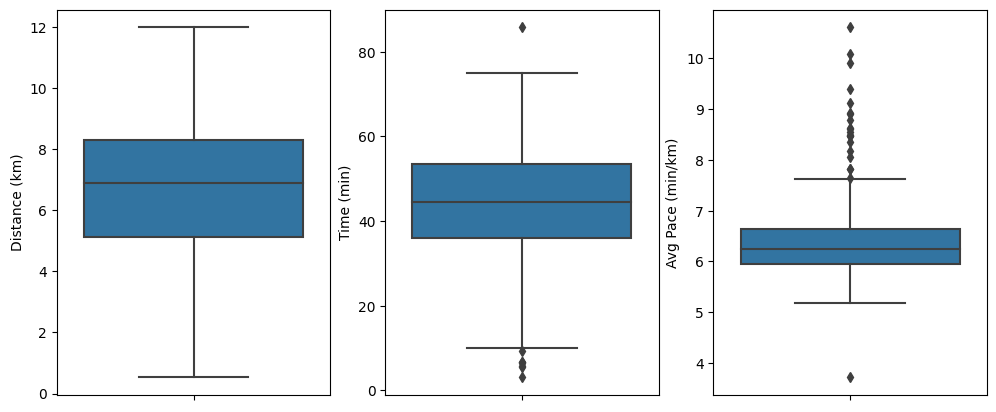

In [15]:
f, axes = plt.subplots(1, 3, figsize=(12,5))

sns.boxplot(data=df_activity, y = 'distance', ax=axes[0])
sns.boxplot(data=df_activity, y = 'time', ax=axes[1])
sns.boxplot(data=df_activity, y = 'avg_pace', ax=axes[2])

axes[0].set_ylabel('Distance (km)')
axes[1].set_ylabel('Time (min)')
axes[2].set_ylabel('Avg Pace (min/km)')

plt.show()

In [16]:
def outliers(df, col):
    summary = df[col].describe()
    iqr = summary.loc['75%'] - summary.loc['25%']
    lower_bound = summary.loc['25%']  - iqr * 1.5 
    upper_bound = summary.loc['75%']  + iqr * 1.5 
    return lower_bound, upper_bound

# Function to identify the outliers 
def id_outliers(df, col):
    return df.loc[df[col] > outliers(df, col)[1]]

id_outliers(df_activity, 'avg_pace').head()

,activity_type,title,date,distance,time,avg_pace,calories,avg_hr,max_hr,elapsed_time,year,hour,month,weekday
9,Running,Running,2022-08-18 16:26:57,4.78,50.75,10.62,264.0,103,116,50.75,2022,16:26:57,Aug,Thu
15,Running,Running,2022-08-03 16:04:57,4.92,41.70,8.48,478.0,148,179,41.70,2022,16:04:57,Aug,Wed
18,Running,Running,2022-07-26 16:45:55,4.23,36.38,8.62,376.0,141,179,36.38,2022,16:45:55,Jul,Tue
19,Running,Running,2022-07-25 16:39:42,4.87,40.65,8.35,445.0,142,174,40.65,2022,16:39:42,Jul,Mon
20,Running,Running,2022-07-19 16:50:46,4.63,40.62,8.78,387.0,131,167,40.62,2022,16:50:46,Jul,Tue


## Exploratory Data Analysis

### Q1. How many running activities were made in previous years?

Total activities:  294


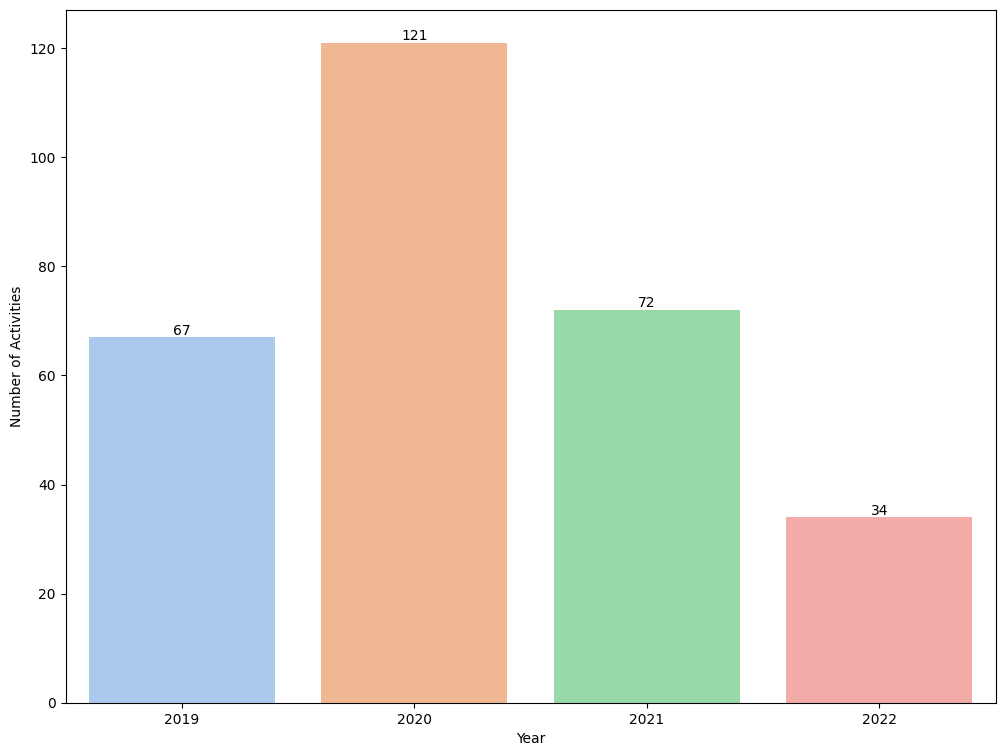

In [17]:
print('Total activities: ' , df_activity.activity_type.count())
plt.figure(figsize=(12,9))
cp = sns.countplot(data=df_activity, x='year',order=['2019','2020','2021', '2022'], palette='pastel')
cp.set_xlabel("Year")
cp.set_ylabel("Number of Activities")

for p in cp.patches:
    cp.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

### Q2. What is the total distance for each month and year?

In [18]:
distance_table = df_activity.pivot_table(values='distance', aggfunc='sum', columns='month', index='year')
column_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
distance_table = distance_table.reindex(column_order, axis=1)
distance_table.fillna('0')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2019,0,0,0,0,0,44.42,84.41,70.23,64.62,25.67,56.73,69.71
2020,105.11,42.85,27.84,54.47,58.54,120.63,51.71,104.27,85.76,102.13,56.6,61.26
2021,75.55,43.4,20.15,65.95,99.81,64.57,59.00,0,40.41,44.12,6.8,0
2022,44.3,16.67,0,0,12.2,0,20.39,77.49,28.80,6.74,0,0


### Q3. What is the distribution of running activities by  day of the week and time performed during previous years?

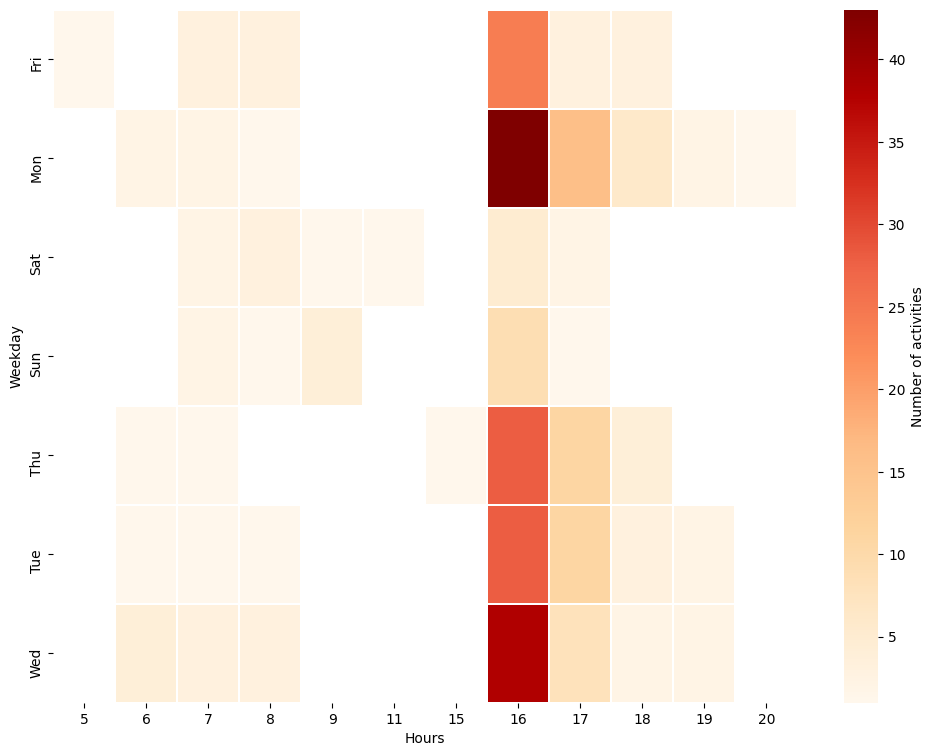

In [19]:
df_activity_copy = df_activity.copy(deep=False)

df_activity_copy['only_hour'] = df_activity_copy['date'].dt.hour

group = df_activity_copy.groupby(['weekday','only_hour']).size()

cross_pivot = group.unstack()
cross_pivot.fillna('0')

plt.figure(figsize=(12,9))
sns.heatmap(cross_pivot, linewidths=1.4, cmap = 'OrRd', cbar_kws={'label': 'Number of activities'})
plt.xlabel('Hours')
plt.ylabel('Weekday')
plt.show()

### Q4. How many activities were made each year divided by the day of the week?

In [20]:
activities = df_activity.pivot_table(values='activity_type', aggfunc='count', columns='weekday', index='year').round(2)
column_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
activities = activities.reindex(column_order, axis=1)
activities.fillna('0')

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2019,15.0,9.0,16.0,8.0,10.0,3.0,6.0
2020,29.0,16.0,25.0,17.0,18.0,7.0,9.0
2021,18.0,14.0,13.0,13.0,9.0,3.0,2.0
2022,11.0,8.0,6.0,8.0,0,1.0,0


### Q5. How many activities were made each month divided by day of the week?

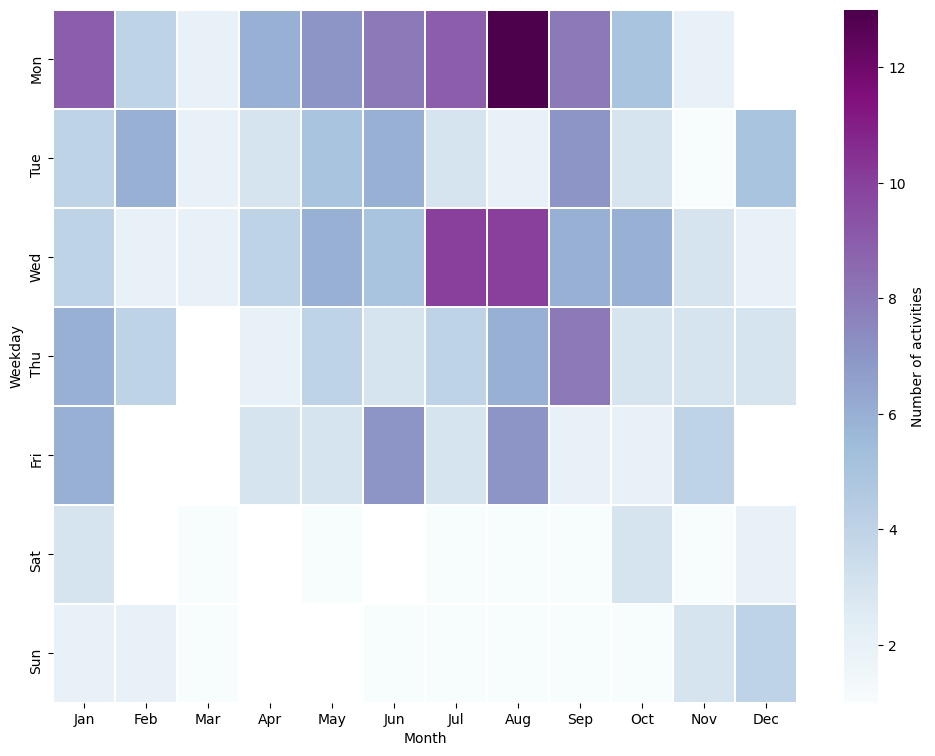

In [21]:
tableII = df_activity.pivot_table(values='activity_type', aggfunc='count', columns='month', index='weekday')
column_orderI = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
column_orderII = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tableII = tableII.reindex(column_orderI, axis=1)
tableII = tableII.reindex(column_orderII, axis=0)

plt.figure(figsize=(12,9))
sns.heatmap(tableII, linewidths=1.4, cmap='BuPu', cbar_kws={'label': 'Number of activities'})

plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()

### Q6. What is the maximum, minimum, and average fare, distance, and activity time?

In [22]:
print('Maximum distance:', df_activity.distance.max(), 'km')
print('Minimum distance:', df_activity.distance.min(), 'km')
print('Average distance:', round(df_activity.distance.mean(), 2), 'km')
print('Minimum pace:', round(df_activity.avg_pace.min(),2),'min/km')
print('Average pace:', round(df_activity.avg_pace.mean(),2),'min/km')
print('Total calories:', int(df_activity.calories.sum()),'cal')
print('Total time:', round(df_activity.elapsed_time.sum()/60,2),'hours')

Maximum distance: 12.01 km
Minimum distance: 0.54 km
Average distance: 6.85 km
Minimum pace: 3.72 min/km
Average pace: 6.42 min/km
Total calories: 168909 cal
Total time: 216.65 hours



### Conclusions

Let us revisit the questions and summarize our conclusion.

**Q1. How many running activities were made in previous years?**

I made 294 activities in 4 years. See that, in the peak year of the Covid-19 pandemic (2020) running activities increased compared to the previous year and decreased in 2021. In 2022, the watch had an activity log problem because the GPS broke.

**Q2. What is the total distance for each month per year?**

In the table, we show the total distance for each month per year. Note that, I ran 120.63 km in July/2020.

**Q3. What is the distribution of running activities by  day of the week per time performed during previous years?**

In the plot, we show the distribution of running activities by day of the week per time. See that, activities are concentrated in the afternoon.

**Q4. How many activities were made each year divided by the day of the week?**

Mondays of the 2020 was day of the week with more activities.   

**Q5. How many activities were made each month divided by day of the week?**

Mondays in August was period that more activities. Note that, on weekends the number of running activities is lower than on other days. 

**Q6. What is the maximum, minimum, and average distance, pace, and activity time?**

Maximum distance: 12.01 km,  Minimum distance: 0.54 km, Average distance: 6.85 km, Average pace: 6.42 min/km, Total calories: 168909 cal, Total time: 216.65 hours.